In [1]:
from manifold_learning import CCM
from manifold_learning.utils import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [3]:
def get_truncated_lorenz_rand(tmax = 140, n_steps = 10000, sigma=10, beta=8/3, rho=28):
    initial_state = np.random.normal(size=(3))

    trunc = int(n_steps/tmax * 40) # Number of steps to get independence from initial conditions
    t_eval = np.linspace(0, tmax, trunc + n_steps)

    solution = solve_ivp(lorenz, (0, tmax), initial_state, args=(sigma, beta, rho), t_eval=t_eval).y.T[trunc:]
    return solution

In [43]:
N_sys = 5

# Generate X axes of Lorenz systems starting from different initial state
X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]

In [44]:
np.array(X_emb).shape

(15, 29880, 5)

In [45]:
ccm = CCM.CCM(device="cpu")

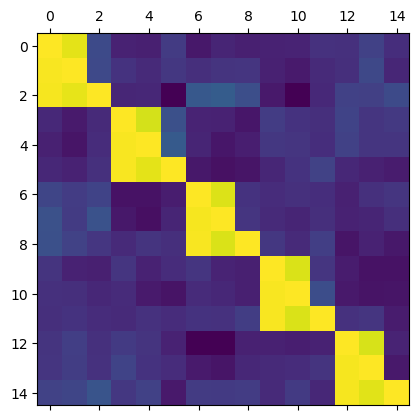

In [49]:
plt.matshow(ccm.compute(X_emb,X_emb,2000,500,30,10,0)[0])

### Time statististics

#### CPU

In [23]:
ccm = CCM.CCM(device="cpu")

In [33]:
N_sys = 1

X = np.array([get_truncated_lorenz_rand(280,n_steps=30000)[:,0] for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((1, 29880, 5), (1, 29880, 1))

In [34]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

4.48 ms ± 46.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Results: 1x1 matrix **4.48ms** per pair
___

In [35]:
N_sys = 5

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((15, 29880, 5), (15, 29880, 1))

In [36]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

12.8 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Results: 15x15 matrix **0.057ms** per pair
___

In [41]:
N_sys = 50

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((150, 29880, 5), (150, 29880, 1))

In [42]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

187 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Results: 150x150 matrix **0.0083ms** per pair
___

In [44]:
N_sys = 120

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((360, 29880, 5), (360, 29880, 1))

In [45]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

709 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Results: 360x360 matrix **0.0055ms** per pair
___

#### GPU

In [47]:
ccm = CCM.CCM(device="cuda")

In [49]:
N_sys = 1

X = np.array([get_truncated_lorenz_rand(280,n_steps=30000)[:,0] for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((1, 29880, 5), (1, 29880, 1))

In [50]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

1.73 ms ± 84.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Results: 1x1 matrix **1.73ms** per pair
___

In [52]:
N_sys = 5

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((15, 29880, 5), (15, 29880, 1))

In [53]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

9.59 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Results: 15x15 matrix **0.042ms** per pair
___

In [55]:
N_sys = 50

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((150, 29880, 5), (150, 29880, 1))

In [57]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

114 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Results: 150x150 matrix **0.005** ms per pair
___

In [60]:
N_sys = 120

X = np.concatenate([get_truncated_lorenz_rand(280,n_steps=30000).T for i in range(N_sys)])

X_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,:,0] for x in X]
Y_emb = [utils.get_td_embedding_np(x[:,None],5,30,return_pred=False)[:,[0],0] for x in X]
np.array(X_emb).shape, np.array(Y_emb).shape

((360, 29880, 5), (360, 29880, 1))

In [61]:
%%timeit
ccm.compute(X_emb,Y_emb,1000,250,30,10,0)

326 ms ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Results: 360x360 matrix **0.0025** ms per pair
___

CPU device: **13th Gen Intel(R) Core(TM) i9-13900H**

GPU device: **NVIDIA RTX 3500 Ada Generation Laptop GPU**